In [1]:
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

In [2]:
import pymongo

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from viewing import *
from util import *

In [3]:
boards_ids_df = pd.read_csv('./csv/boards_ids.csv', index_col=None)
boards_params_df = pd.read_csv('./csv/boards_params.csv', index_col=None)

boards_ids = boards_ids_df['Board'].values.tolist()
boards_32_ids = boards_params_df[boards_params_df['Type'] == 32]['Board'].values.tolist()
boards_64_ids = boards_params_df[boards_params_df['Type'] == 64]['Board'].values.tolist()

In [4]:
# Configuration of data frames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Configuration of matplotlib and seaborn
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize']= 16
plt.rcParams['axes.titlesize']= 18
plt.rcParams['axes.labelsize']= 18 
plt.rcParams['figure.titlesize']= 18
plt.rcParams['figure.figsize'] = [28, 14]  # Scale up plots

In [5]:
dropdown_wafer = widgets.Dropdown(options=create_dropdown_values(boards_params_df['Wafer']), 
                                  description='Oblea:')

boards_ids_output = widgets.Output()
summary_boards_out = widgets.Output()

dropdown_boards_eh = generate_simple_eventhandler(boards_ids_output, 
                                                  boards_params_df, 'Wafer')

dropdown_wafer.observe(dropdown_boards_eh, names='value')
lista_placas = widgets.VBox([dropdown_wafer, boards_ids_output])

with summary_boards_out:
    print("Numero de placas: " + str(len(boards_params_df['Board'].index)))
    print("Numero de obleas: " + str(len(set(boards_params_df['Wafer']))))
    print("Numero de lotes : " + str(len(set(boards_params_df['Lot']))))

tab_boards_ids = widgets.Tab([lista_placas, summary_boards_out])
tab_boards_ids.set_title(0, 'Lista de placas')
tab_boards_ids.set_title(1, 'Resumen')

# Parametros de identificación de una placa

Cada placa posee un identificador de 96 bits.

En cada ID se codifican, por orden:

+ Oblea a la que pertenece el microprocesador.
+ Lote al que pertenece el microprocesador.
+ Coordenada X del microprocesador en la oblea.
+ Coordenada Y del microprocesador en la oblea.

In [6]:
display(tab_boards_ids)

In [7]:
diffs_regions_all_df = pd.read_csv('./csv/diffs_regions_all_boards.csv', index_col=None)
diffs_regions_all_df.sort_values(['Region'], ascending=[True], inplace=True)

# TODO: Separar en placas de 32 y 64
# diffs_regions_all_32_df = 

diffs_regions_summary_df = pd.read_csv('./csv/diffs_regions_all_boards_summary.csv')

In [8]:
dropdown_region = widgets.Dropdown(options=create_dropdown_values(diffs_regions_all_df['Region']), 
                                   description='Region:')

regions_output = widgets.Output()
plot_regions_output = widgets.Output()
region_summary_output = widgets.Output()

blue_sns_palette = sns.color_palette("ch:3.5,-.3,dark=1")

with region_summary_output:
    display(diffs_regions_summary_df)

def dropdown_region_eh(change):
        regions_output.clear_output()
        plot_regions_output.clear_output()
        
        if (change.new == 'Ninguno'):
            regions_output.clear_output()
            plot_regions_output.clear_output()
            
        elif (change.new == 'Todos'):
            with regions_output:
                display(diffs_regions_all_df)
            fig, ax = plt.subplots()
            fig.set_size_inches(28, 180)
            ax = sns.violinplot(y="Region", x="Diff", data=diffs_regions_all_df, 
                                inner='point', linewidth=3.0, cut=0.0, 
                                orient='h', scale='count', palette=blue_sns_palette)
            ax.xaxis.set_major_locator(plt.MultipleLocator(5))
            figure = ax.get_figure()
            figure.savefig('./img/diffs_regions_all.png')
            
            with plot_regions_output:
                display(plt.show())

        else:
            data_df = diffs_regions_all_df[diffs_regions_all_df['Region'] == change.new]
            with regions_output:
                display(data_df)

            fig, ax = plt.subplots()
            ax = sns.violinplot(y="Region", x="Diff", data=data_df,
                                orient='h',cut=0.0,
                                linewidth=4.0, palette=blue_sns_palette)
            ax.xaxis.set_major_locator(plt.MultipleLocator(5))
            
            with plot_regions_output:
                display(plt.show())

            
dropdown_region.observe(dropdown_region_eh, names='value')

tab_regions_all = widgets.Tab([regions_output, plot_regions_output, region_summary_output])
tab_regions_all.set_title(0, 'Diffs de regiones')
tab_regions_all.set_title(1, 'Distribucion')
tab_regions_all.set_title(2, 'Resumen')

# Comparación de muestras en una placa

## TODO: Diferenciar entere placas de 32 y 64 con un selector

+ En la primera pestaña se puede ver las diferencias entre muestras para la region seleccionada.
+ En la pestaña distribución se puede ver la distribución de los datos de todas las placas.
  + Al seleccionar una sola region, en el centro del gráfico aparece un boxplot para resumir los datos.
  + Al seleccionar todas las regiones, aparecen las muestras representadas como puntos.
+ En la pestaña resumen, se puede ver un resumen global con los datos de todas las placas.

> Las gráficas de violin te representan la diferencia entre muestras en el eje X y la distribucion de las muestras en el eje Y.

In [9]:
display(dropdown_region)
display(tab_regions_all)

Dropdown(description='Region:', options=('Ninguno', 'Todos', '0x20000000', '0x20000200', '0x20000400', '0x2000…

In [10]:
diffs_regions_pairs_boards_df = pd.read_csv('./csv/diffs_regions_pair_boards.csv', index_col=None)
diffs_regions_pairs_boards_df.sort_values(['Region'], ascending=[True], inplace=True)

diffs_regions_pairs_boards_summary_df = pd.read_csv('./csv/diffs_regions_pair_boards_summary.csv', index_col=None)

In [15]:
dropdown_pairs_region = widgets.Dropdown(options=create_dropdown_values(diffs_regions_pairs_boards_df['Region']), 
                                         description='Region:')

pairs_output = widgets.Output()
plot_pairs_output = widgets.Output()
pairs_summary_output = widgets.Output()

with pairs_summary_output:
    display(diffs_regions_pairs_boards_summary_df)

def dropdown_pairs_eh(change):
        pairs_output.clear_output()
        plot_pairs_output.clear_output()
        
        if (change.new == 'Ninguno'):
            regions_output.clear_output()
            plot_pairs_output.clear_output()
            
        elif (change.new == 'Todos'):
            with pairs_output:
                display(diffs_regions_pairs_boards_df)
            fig, ax = plt.subplots()
            fig.set_size_inches(28, 180)
            ax = sns.violinplot(y="Region", x="Diff", data=diffs_regions_pairs_boards_df, 
                                inner='point', linewidth=3.0, cut=0.0, 
                                orient='h', scale='count', palette=blue_sns_palette)
            ax.xaxis.set_major_locator(plt.MultipleLocator(5))
            figure = ax.get_figure()
            figure.savefig('./img/diffs_regions_pairs_boards.png')
            
            with plot_pairs_output:
                display(plt.show())

        else:
            data_df = diffs_regions_pairs_boards_df[diffs_regions_pairs_boards_df['Region'] == change.new]
            
            with pairs_output:
                display(data_df)

            ax = sns.violinplot(y="Region", x="Diff", data=data_df,
                                orient='h',cut=0.0,
                                linewidth=4.0, palette=blue_sns_palette)
            ax.xaxis.set_major_locator(plt.MultipleLocator(5))
            
            with plot_pairs_output:
                display(plt.show())

            
dropdown_pairs_region.observe(dropdown_pairs_eh, names='value')

tab_regions_pairs = widgets.Tab([pairs_output, plot_pairs_output, pairs_summary_output])
tab_regions_pairs.set_title(0, 'Diffs de regiones')
tab_regions_pairs.set_title(1, 'Distribucion')
tab_regions_pairs.set_title(2, 'Resumen')

# Comparación de muestras de la misma región entre placas

Ahora se han comparado las muestras de la misma región entre distintas placas.

+ En la primera pestaña se puede ver las diferencias entre muestras de la misma region para todas las placas.
+ En la pestaña distribución se puede ver la distribución de los datos de todas las placas.
  + Las gráficas de violin te representan la diferencia entre muestras en el eje X y la distribución de las muestras en el eje Y.
+ En la pestaña resumen, se puede ver un resumen global con los datos de todas las zonas.

> Hay una gran cantidad de datos, por lo que al escoger Todos, es muy probable que tarde en mostrar los datos.

In [16]:
display(dropdown_pairs_region)
display(tab_regions_pairs)

Dropdown(description='Region:', options=('Ninguno', 'Todos', '0x20000000', '0x20000200', '0x20000400', '0x2000…

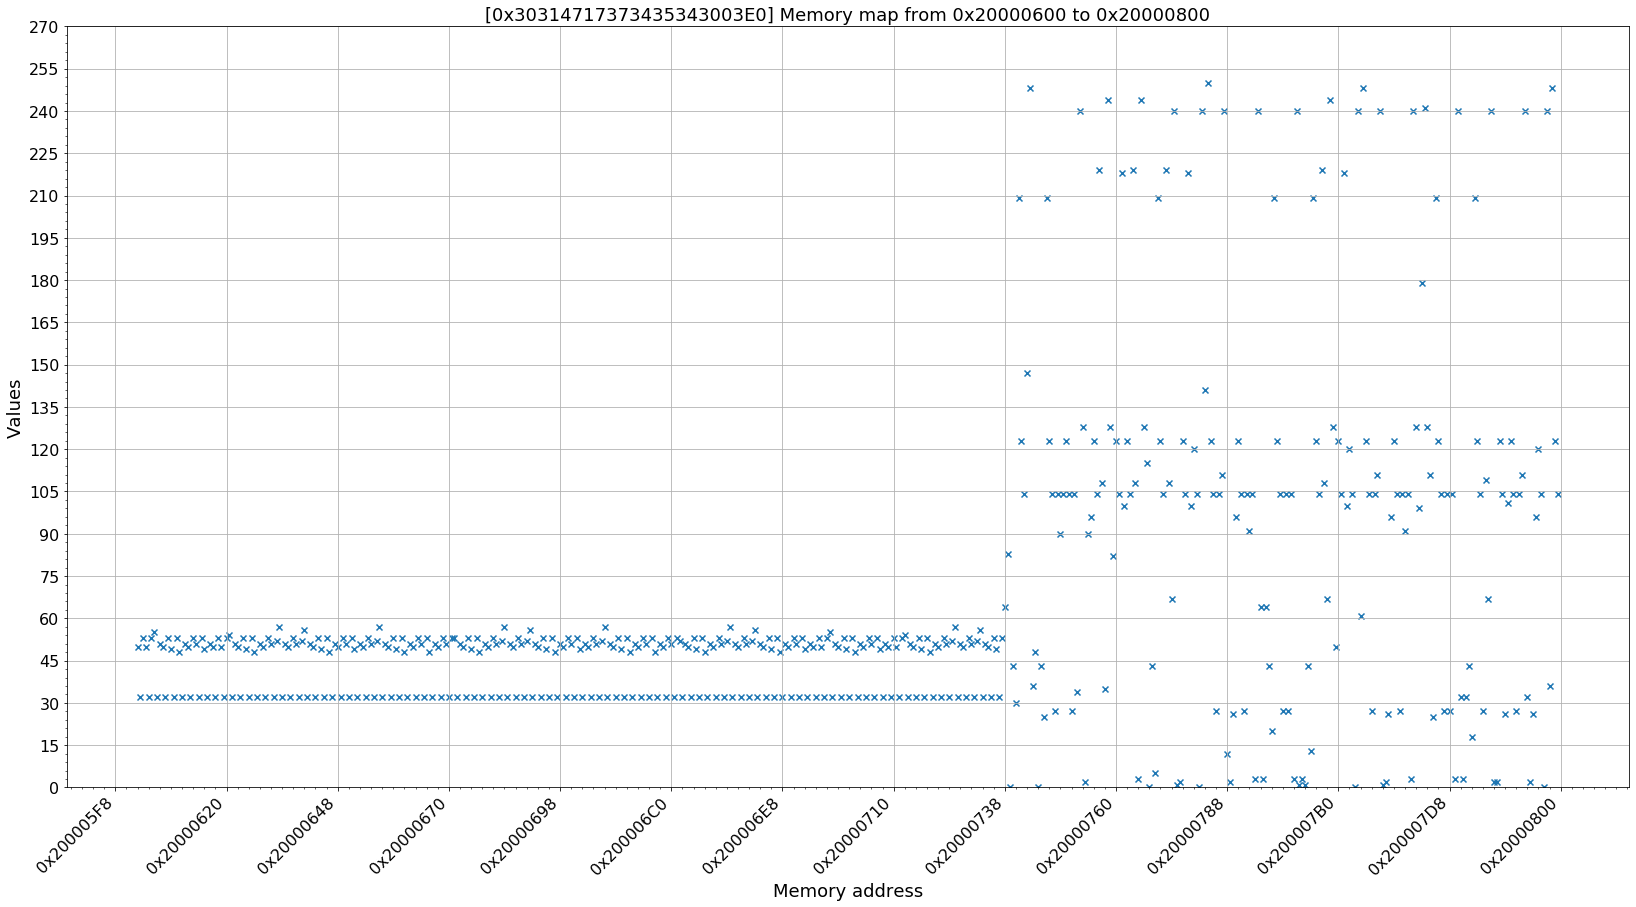

In [13]:
plot_memory_regions('0x30314717373435343003E0', add_to_off(0x20000600), add_to_off(0x20000600) + 1, show_every=False)

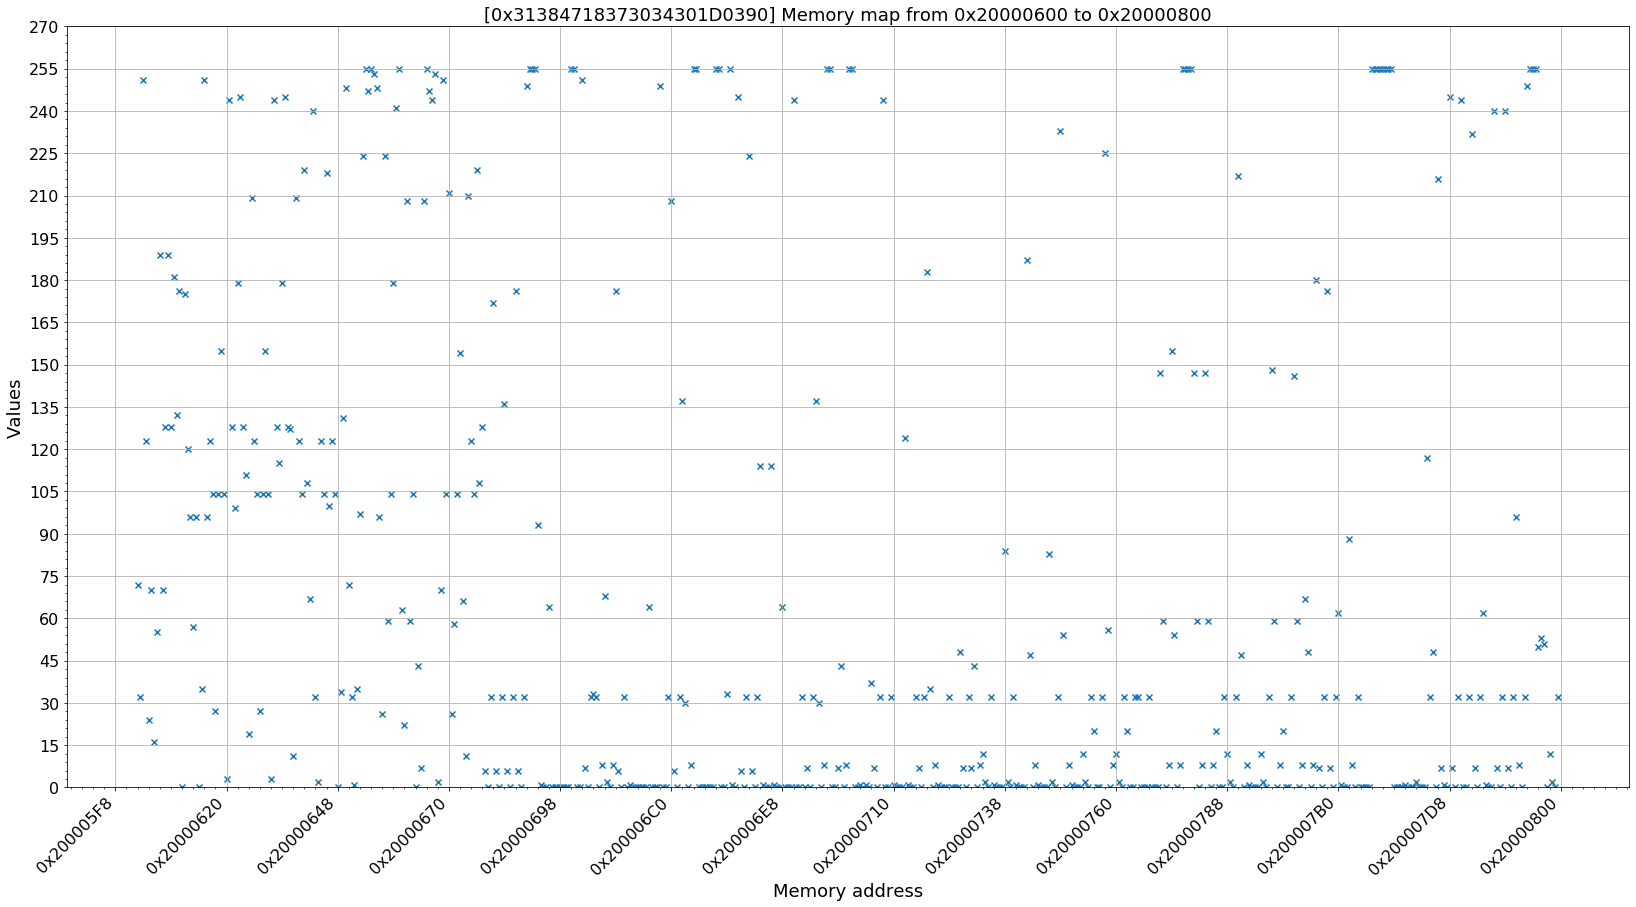

In [14]:
plot_memory_regions(boards_ids[50], add_to_off(0x20000600), add_to_off(0x20000600) + 1, show_every=False)